## **`TP2`**

Este archivo posee diferentes scripts de trabajo, el script definitivo es el archivo main.py.
El enunciado se encuentra en el archivo Readme.md

Este escript tiene varios analisis preliminares e informacion usada para desarrollar el script main.py

Trabajaremos con el dataset(E-Commerce_train.xls). Importo las librarias que preciso para un analisis preliminar del dataset.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
data = pd.read_excel('E-Commerce_train.xlsx')

In [169]:
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [47]:
data.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [48]:
data.shape

(8999, 12)

Verificamos si tenemos instancias duplicadas:

In [49]:
data[data.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


No hay duplicadas, ahora buscamos gráficamente los valores nulos / faltantes:

In [50]:
import missingno as msno

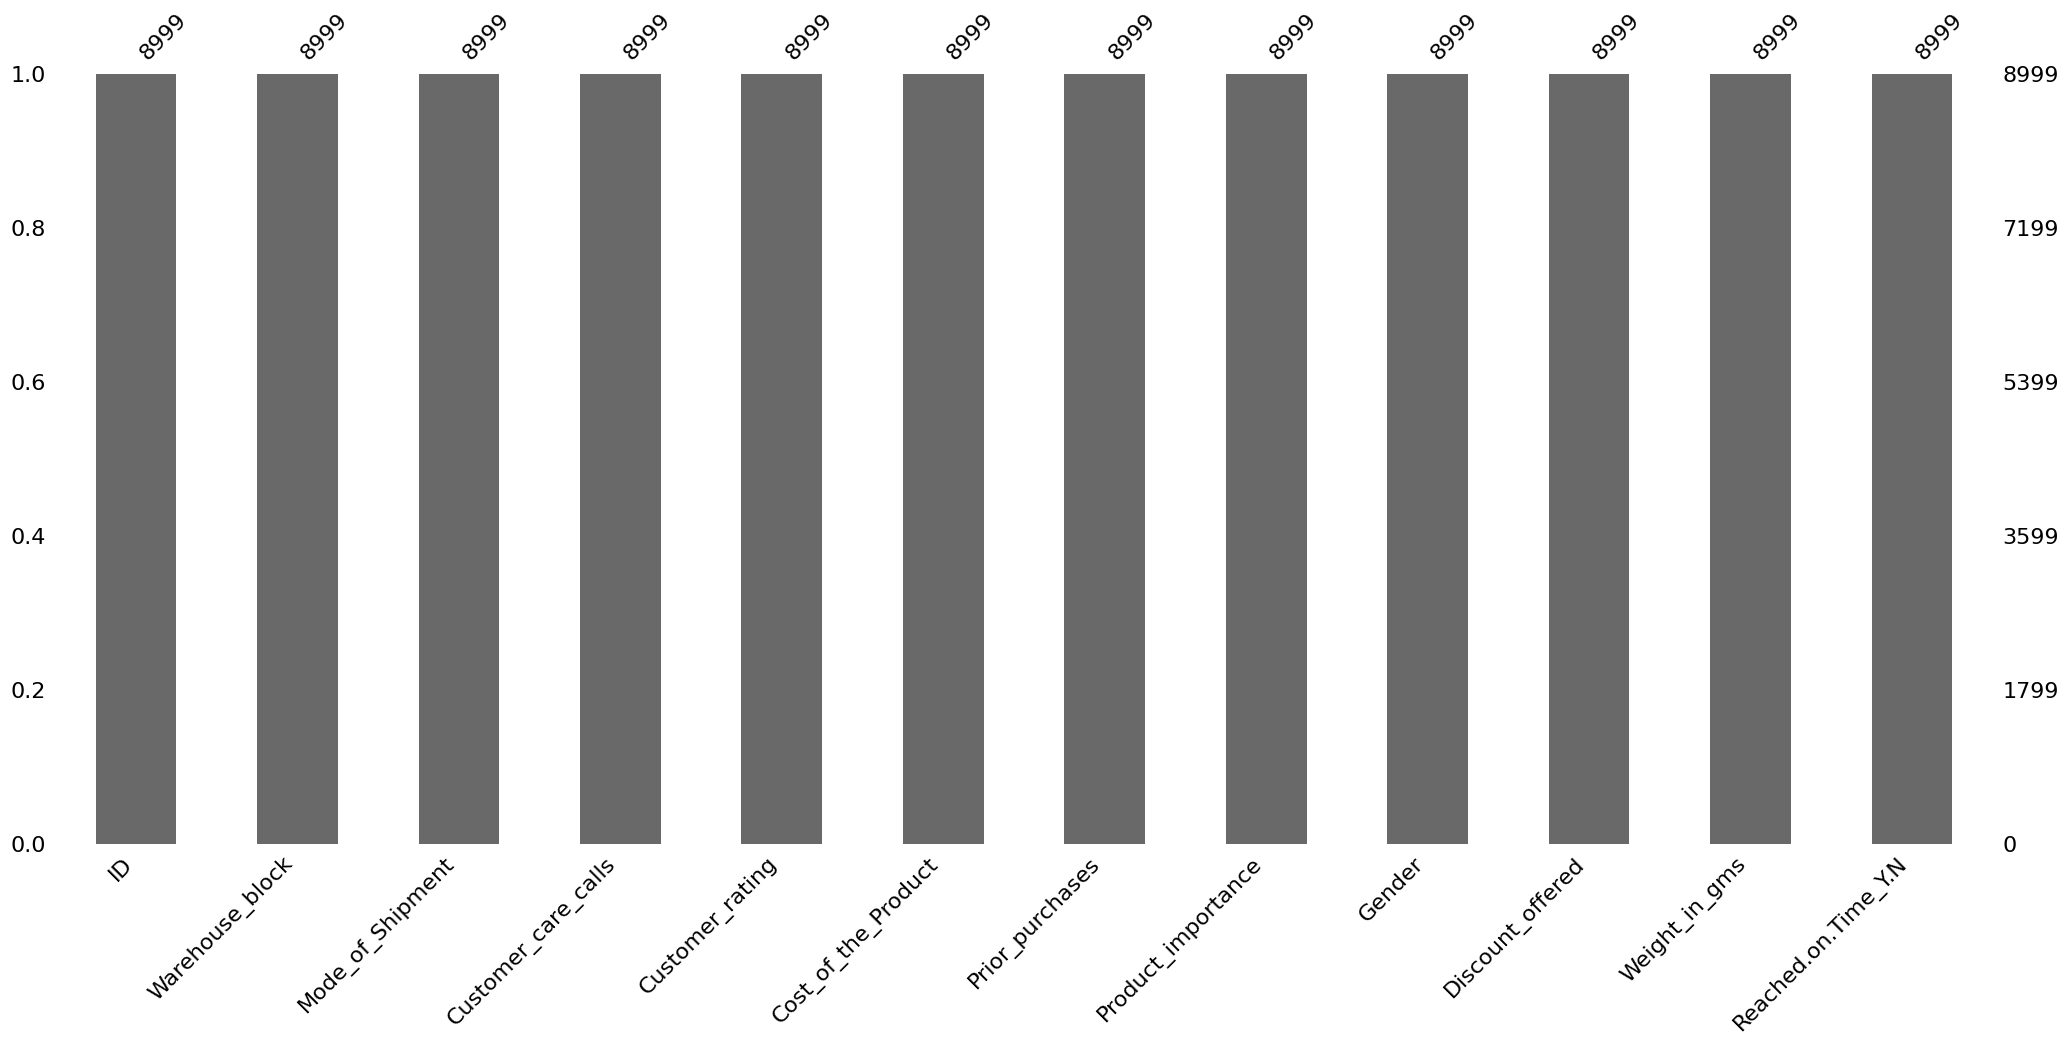

In [51]:
msno.bar(data)
plt.show()

No hay faltantes. Ahora busco valores atipicos (outliers):

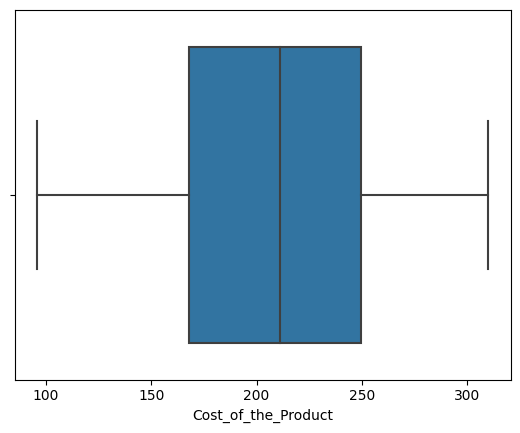

In [194]:
sns.boxplot(x = 'Cost_of_the_Product', data = data)
plt.show()

No hay atipicos en Costo del Producto, sigo buscando en otras variables:

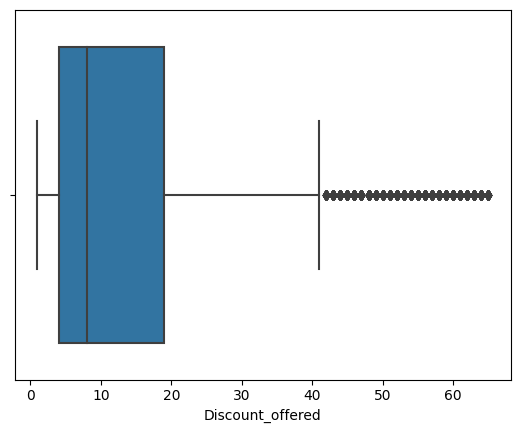

In [52]:
sns.boxplot(x = 'Discount_offered', data = data)
plt.show()

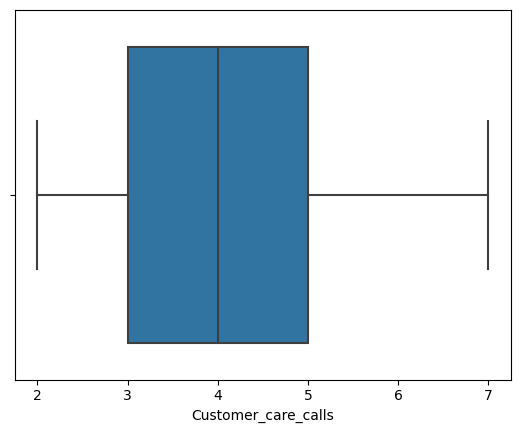

In [24]:
sns.boxplot(x = 'Customer_care_calls', data = data)
plt.show()

*Aparenta que la columna de descuento tiene outliers, utilizo la tecnica del rango intercuartiles, pero solo para la parte superior al 75%, Ya que tiene logica descuentos en el primer cuartil:

In [55]:
Q1 = data['Discount_offered'].quantile(0.00)#Pongo cero porque en realidad descuentos inferiores a 25 estarian bien.
Q3 = data['Discount_offered'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print("Serian outliers con este metodo los mayores a: ",BS)

1.0
19.0
18.0
-26.0
Serian outliers con este metodo los mayores a:  46.0


In [54]:
print('Cantidad de registros totales:', data.shape[0])
print('Cantidad de outliers:', data[(data['Discount_offered']<BI) | (data['Discount_offered']>BS)].shape[0] )

Cantidad de registros totales: 8999
Cantidad de outliers: 938


De este analisis, se desprende que podriamos elimiar los 938 registros con descuento mayor a 46% pero... si eliminamos los outliers, podriamos perder info que no sabemos a priori si esta corralacionada con las demoras en la entrega y ademas el enunciado dice hasta 65%, verifco si se pasa de 65:

In [7]:
print(np.where(data['Discount_offered']>65))

(array([], dtype=int64),)


No hay ninguno mayor a 65. Asi que a priori no elimino ningun dato.

In [200]:
# Veamos si conviene Normalizar los datos, Probamos el método StandardScaler

from sklearn.preprocessing import StandardScaler

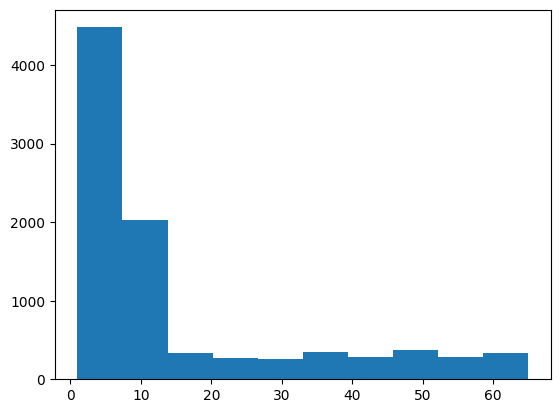

In [8]:
# Trabajaremos con la variable Dicount, veamos su distribución

plt.hist(data['Discount_offered']) 
plt.show()

No tiene sentido aplicarle normalizacion a estos valores, se va a mantener la distribucion con valores entre -0.75 y 2.75

In [25]:
# Calculo media de las variables numericas con respecto a la ultima columna (llego a tiempo)

data.groupby('Reached.on.Time_Y.N').mean()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached.on.Time_Y.N,,,,,,,
0,6068.077134,4.123780,2.974390,213.883537,3.609146,5.532012,4281.294817
1,3600.665676,3.952789,3.006819,205.509180,3.455499,20.583843,3184.656408


In [56]:
data.groupby('Discount_offered').mean()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Weight_in_gms,Reached.on.Time_Y.N
Discount_offered,,,,,,,
1,5752.525822,4.078247,2.956182,212.403756,3.539906,4126.757433,0.494523
2,5668.384969,4.157975,3.058282,215.262270,3.533742,4012.980061,0.509202
3,5681.601866,4.110420,2.979782,215.143079,3.608087,4039.009331,0.486781
4,5711.110759,4.072785,2.925633,212.058544,3.503165,4135.813291,0.473101
5,5689.824759,4.120579,2.993569,212.313505,3.657556,4184.430868,0.495177
...,...,...,...,...,...,...,...
61,1561.320755,3.924528,2.830189,204.981132,3.547170,2371.962264,1.000000
62,1505.102041,3.734694,3.142857,200.734694,3.591837,2401.571429,1.000000
63,1609.584906,3.698113,2.754717,196.245283,3.433962,2145.415094,1.000000


En este analisis exploratorio, aparenta haber alguna relacion entre el Descuento aplicado y el plazo de entrega. Voy a graficar.

In [170]:
# Renombramos para sacar los puntos de la columna llego a tiempo:
data=data.rename({'Reached.on.Time_Y.N':'Reached_on_Time'}, axis=1)

<AxesSubplot: xlabel='Discount_offered'>

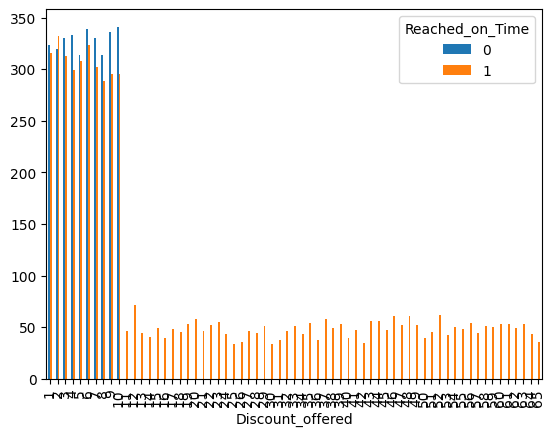

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(data.Discount_offered, data.Reached_on_Time).plot(kind='bar')

Se evidencia que cuando el descuento es mayor a 10, llegaron todos los envios (salida 1) y los que tienen descuento de 10 o menos, algunos llegaron y otros no. Esto lo vamos a analizar mas adelante, porque probablemente convenga eliminar los de mas de 10 para fitear el modelo.

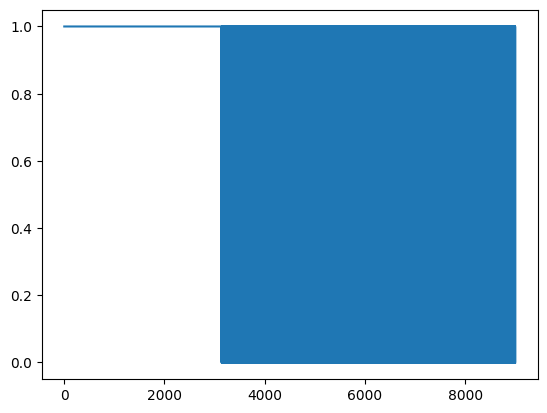

In [41]:
plt.plot(data["ID"],data["Reached_on_Time"])

Se evidencia que los registros menores a 3000 llegaron todos, vamos a verificar el numero exacto:

In [43]:
data[data["ID"].between(3130,3140)]  # Se varifica q hasta el ID 3135 llegaron todos.

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
3129,3130,B,Road,3,4,248,2,medium,F,15,2983,1
3130,3131,C,Road,6,5,246,4,medium,M,50,3618,1
3131,3132,F,Road,4,1,232,3,medium,M,55,2686,1
3132,3133,D,Road,3,5,251,3,low,F,21,2476,1
3133,3134,F,Road,3,4,163,3,medium,M,58,1443,1
3134,3135,A,Road,6,4,201,2,low,M,4,5916,1
3135,3136,B,Road,6,5,141,3,medium,M,8,5031,0
3136,3137,C,Road,3,3,219,3,low,M,4,5956,0
3137,3138,F,Road,4,3,161,3,high,M,7,4245,0
3138,3139,D,Road,4,5,225,4,medium,M,5,4622,0


Resumiendo: Del analisis exploratorio, determinamos estos dos posibles sesgos para el modelo.
 1. El descuento mayor a 10% y
 2. Los datos hasta el 3135
 
 Todos estos datos con salida Reached_onTime igual a 1
 Lo consideraremos en una 2da. etapa del modelo.

Codificacion de variables categoricas: Hay 4 columas para codificar una variable nominal:

In [206]:
print(data.iloc[:,[0,1,6,7]])

     Warehouse_block Mode_of_Shipment Product_importance Gender
ID                                                             
1                  D           Flight                low      F
2                  F           Flight                low      M
3                  A           Flight                low      M
4                  B           Flight             medium      M
5                  C           Flight             medium      F
...              ...              ...                ...    ...
8995               D             Ship                low      F
8996               F             Ship             medium      M
8997               A             Ship             medium      F
8998               B             Ship             medium      F
8999               C             Ship                low      M

[8999 rows x 4 columns]


In [207]:
# Veamos la cantidad por cada columna:

data.Warehouse_block.unique()


array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [208]:
data.Warehouse_block.value_counts()

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

In [209]:
data.Mode_of_Shipment.unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [210]:
data.Product_importance.unique()

array(['low', 'medium', 'high'], dtype=object)

In [171]:
# Usaremos LabelEncoder para darle valor numerico a estas variables cualitativas
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Product_importance'] = label_encoder.fit_transform(data['Product_importance'])
data["Warehouse_block"]= label_encoder.fit_transform(data['Warehouse_block'])
data['Mode_of_Shipment']=label_encoder.fit_transform(data['Mode_of_Shipment'])
data['Gender']=label_encoder.fit_transform(data['Gender'])

In [212]:
data['Product_importance'].value_counts()

1    4308
2    3858
0     833
Name: Product_importance, dtype: int64

In [213]:
# Observamos cómo cambió todos los valores por 0 para High, 1 para Low y 2 para medium.

data['Product_importance']

ID
1       1
2       1
3       1
4       2
5       2
       ..
8995    1
8996    2
8997    2
8998    2
8999    1
Name: Product_importance, Length: 8999, dtype: int32

In [214]:
# Observamos cómo cambió todos los valores por 0=A, 1=B, 2=C 3=D, 4=F

data['Warehouse_block']

ID
1       3
2       4
3       0
4       1
5       2
       ..
8995    3
8996    4
8997    0
8998    1
8999    2
Name: Warehouse_block, Length: 8999, dtype: int32

In [215]:
# Observamos como se cambió todos los valores por 0 para Flight, 1 para Road  y 2 para Ship.

data['Mode_of_Shipment']

ID
1       0
2       0
3       0
4       0
5       0
       ..
8995    2
8996    2
8997    2
8998    2
8999    2
Name: Mode_of_Shipment, Length: 8999, dtype: int32

In [216]:
# En Gender quedo 0=Femenino 1=Masculino
data['Gender']

ID
1       0
2       1
3       1
4       1
5       0
       ..
8995    0
8996    1
8997    0
8998    0
8999    1
Name: Gender, Length: 8999, dtype: int32

Asi queda el dataset de entrenamiento, con las variables categoricas alfanumericas transformadas a numericas:

In [172]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,3,2,3,1,217,3,1,0,1,4177,1
8995,8996,4,2,5,3,232,3,2,1,3,4526,0
8996,8997,0,2,4,5,260,3,2,0,6,4221,0
8997,8998,1,2,4,2,184,3,2,0,5,5931,1


In [173]:
# Voy a verificar si esta balanceado el valor a predecir Reached_on_Time
data['Reached_on_Time'].value_counts()

1    5719
0    3280
Name: Reached_on_Time, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

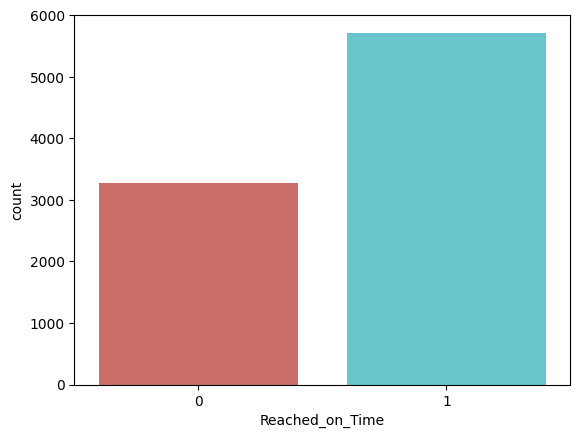

In [60]:
sns.countplot(x='Reached_on_Time', data=data, palette='hls')
plt.show

Se evidencia un desbalanceo y si entrenamos el algoritmo va a haber una tendencia a predecir 1(Que llegara a tiempo) por sobre el 0 (no llegara a tiempo).  

Vamos a Balancearlo para luego analizar los modelos de regresion, con la tecnica SMOTE oversampling tomaremos en forma aleatoria datos que contenan igual cantidad de 0 y 1 para la salida Reached_on_Time. Usando la libraria imbalanced-learned. El metodo lo tome de este video: https://www.youtube.com/watch?v=_bm2gPdAbS8

In [180]:
# Usamos la libreria sklearn, la funcion split para dividirlo
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
X=data.loc[:,data.columns != 'Reached_on_Time']
y=data.loc[:,data.columns == 'Reached_on_Time']

from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split (X ,y , test_size=0.30, random_state=7) # test_size se 
# recomienda entre 25% y 35%, probe con las 3 alternativas y 30 es la de mejor recall score
os_data_X, os_data_y = os.fit_resample (X_train, y_train)

#Aca verificamos los datos de nuestra data
print ('Tamanio original del dataset', len(data))
print ('Tamanio del upsampled dataset' , len(os_data_X) )
print ('No llegaron a tiempo en el upsampled data es', len (os_data_y[os_data_y["Reached_on_Time"]==0]))
print ('Si llegaron a tiempo en el upsampled  data es', len (os_data_y[os_data_y["Reached_on_Time"]==1]))


Tamanio original del dataset 8999
Tamanio del upsampled dataset 8054
No llegaron a tiempo en el upsampled data es 4027
Si llegaron a tiempo en el upsampled  data es 4027


In [181]:
os_data_X.shape

(8054, 11)

In [182]:
os_data_y.shape

(8054, 1)

In [183]:
X_train.shape

(6299, 11)

In [184]:
y_train.shape

(6299, 1)

In [185]:
y_test.shape

(2700, 1)

In [186]:
X_test.shape

(2700, 11)

Ahora el over sampled dataset esta balanceado para entrenar al modelo, lo verificamos graficamente:

<function matplotlib.pyplot.show(close=None, block=None)>

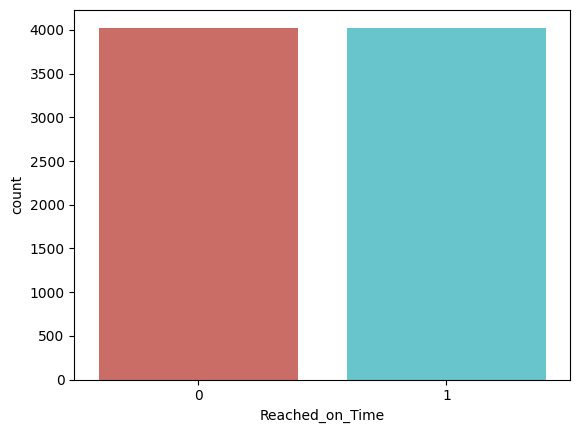

In [187]:
sns.countplot(x='Reached_on_Time', data=os_data_y, palette='hls')
plt.show

In [188]:
os_data_X

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,3537,0,1,4,5,259,2,1,1,7,4390
1,2630,4,2,3,1,140,2,1,0,6,1435
2,761,2,2,5,3,235,2,2,0,12,3358
3,2462,4,0,3,3,246,3,1,1,27,3648
4,7764,4,2,6,4,272,4,2,0,10,1171
...,...,...,...,...,...,...,...,...,...,...,...
8049,5761,2,1,5,2,247,2,1,0,3,5258
8050,8899,3,2,3,5,195,7,2,0,4,5019
8051,6259,1,2,3,3,244,2,2,0,3,4199
8052,7484,3,2,5,5,264,5,1,0,3,1464


In [229]:
# Para determinar si un coeficiente de correlación es estadísticamente significativo
# usaremos la función pearsonr de la biblioteca SciPy. Importamos 
from scipy.stats import pearsonr

In [70]:
# Analisis de la correlacion entre las columnas:
data_trabajo=pd.concat([os_data_X, os_data_y], axis=1)
data_trabajo.corr()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
ID,1.000000,-0.020561,-0.038281,0.181924,-0.038731,0.214689,0.109272,-0.033831,-0.057647,-0.615397,0.302700,-0.493674
Warehouse_block,-0.020561,1.000000,0.010040,0.010921,0.015072,-0.003272,-0.010700,0.017966,0.033376,0.025965,-0.004482,0.046141
Mode_of_Shipment,-0.038281,0.010040,1.000000,-0.017360,0.030328,-0.003610,0.000676,0.012067,0.020639,0.049927,-0.008577,0.074992
Customer_care_calls,0.181924,0.010921,-0.017360,1.000000,0.025965,0.345843,0.189203,0.009159,0.033592,-0.087556,-0.325710,-0.003773
Customer_rating,-0.038731,0.015072,0.030328,0.025965,1.000000,0.021996,0.011175,0.021847,0.032732,0.034441,-0.027832,0.076746
Cost_of_the_Product,0.214689,-0.003272,-0.003610,0.345843,0.021996,1.000000,0.114379,-0.003827,0.015711,-0.127952,-0.144817,-0.072889
Prior_purchases,0.109272,-0.010700,0.000676,0.189203,0.011175,0.114379,1.000000,-0.001329,0.020826,-0.049122,-0.167778,-0.002816
Product_importance,-0.033831,0.017966,0.012067,0.009159,0.021847,-0.003827,-0.001329,1.000000,0.016738,0.054696,-0.044083,0.079901
Gender,-0.057647,0.033376,0.020639,0.033592,0.032732,0.015711,0.020826,0.016738,1.000000,0.046296,-0.041080,0.105756
Discount_offered,-0.615397,0.025965,0.049927,-0.087556,0.034441,-0.127952,-0.049122,0.054696,0.046296,1.000000,-0.400054,0.479415


<AxesSubplot: >

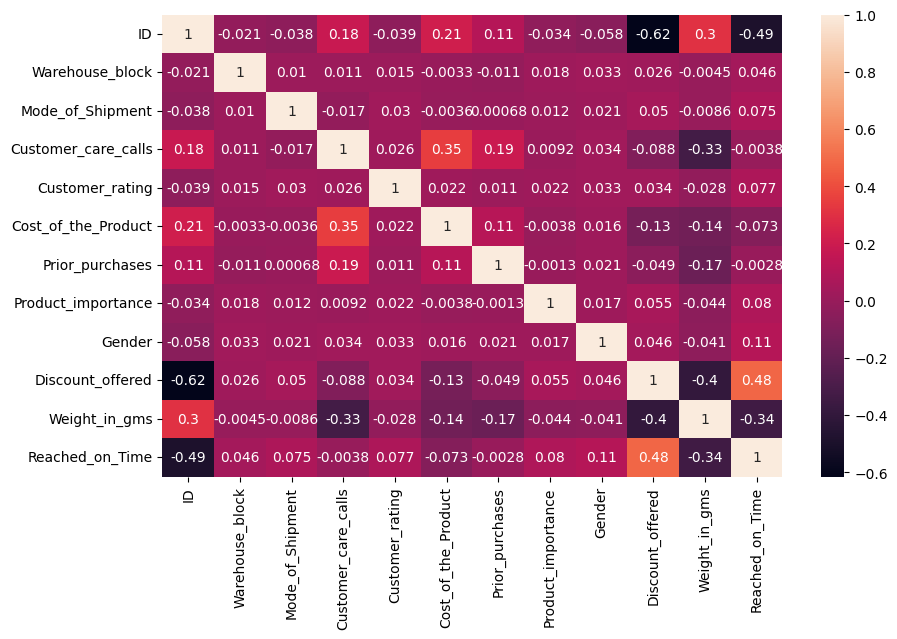

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(data_trabajo.corr(), ax=ax, annot=True)

<AxesSubplot: >

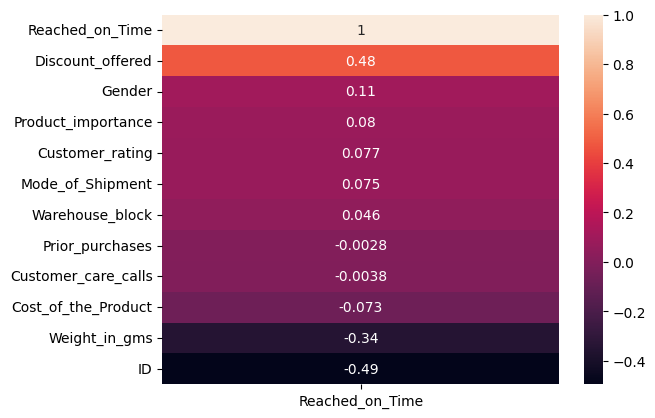

In [72]:
# Para ver la correlacion con la variable target, uso>
corr = data_trabajo.corr()[['Reached_on_Time']].sort_values(by='Reached_on_Time', ascending=False)
sns.heatmap(corr, annot=True)

<AxesSubplot: >

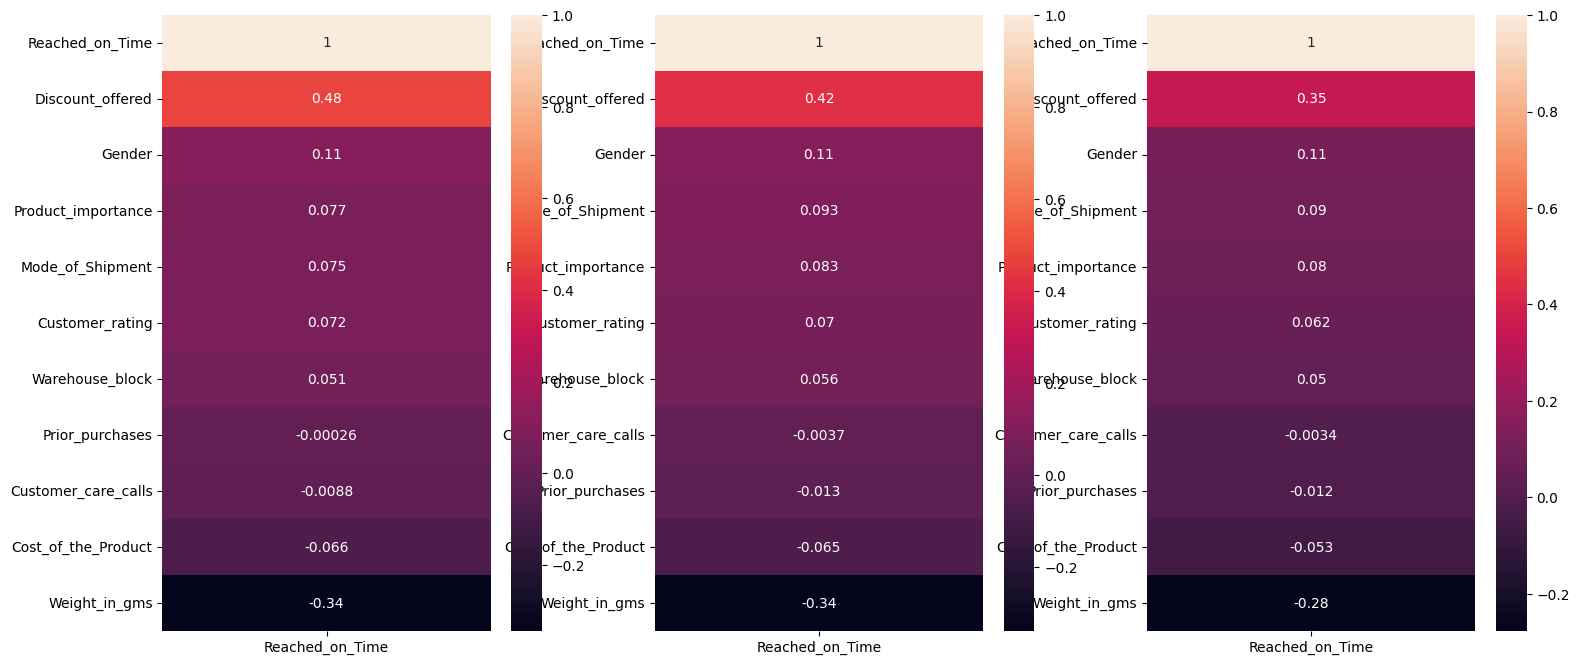

In [233]:
# Finalmente pruebo con 2 metodos distintos a pearson para ver si hay algun cambio signifiativo
fig, ax = plt.subplots(1,3, figsize=(18, 8))

corr1 = data_trabajo.corr('pearson')[['Reached_on_Time']].sort_values(by='Reached_on_Time', ascending=False)
corr2 = data_trabajo.corr('spearman')[['Reached_on_Time']].sort_values(by='Reached_on_Time', ascending=False)
corr3 = data_trabajo.corr('kendall')[['Reached_on_Time']].sort_values(by='Reached_on_Time', ascending=False)


sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

A modo de verificacion, calculo alguno con el metodo pearsonr para ver pvalue de la hipotesis nula.

In [234]:
pearsonr(data_trabajo["Customer_care_calls"],data_trabajo["Reached_on_Time"])

PearsonRResult(statistic=-0.008791907687729257, pvalue=0.43159743067221545)

Aca se ve el coeficiente de correlacion de 0.05 y el porcentaje de 0.00006, dado que es menor a alfa=0.05 concluimos que SI es estadisticamente significativa.

In [235]:
pearsonr(data_trabajo["Discount_offered"],data_trabajo["Reached_on_Time"])

PearsonRResult(statistic=0.4786988795388218, pvalue=0.0)

In [236]:
pearsonr(data_trabajo["Weight_in_gms"],data_trabajo["Reached_on_Time"])

PearsonRResult(statistic=-0.3440215369395786, pvalue=3.4823305797364404e-221)

Del analisis de los graficos anteriores, voy a eliminar las columnas que no tienen correlacion entre si.  

In [189]:
X_train=X_train.drop(["ID","Warehouse_block","Gender","Mode_of_Shipment","Customer_rating","Product_importance"] , axis=1)

X_test=X_test.drop(["ID","Warehouse_block","Gender","Mode_of_Shipment","Customer_rating","Product_importance"] , axis=1)

In [190]:
X_train

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
3536,4,259,2,7,4390
2629,3,140,2,6,1435
760,5,235,2,12,3358
2461,3,246,3,27,3648
7763,6,272,4,10,1171
...,...,...,...,...,...
1372,4,150,2,30,1782
919,3,160,10,25,1548
4307,4,135,3,6,5266
5699,3,170,2,2,5662


In [191]:
# Verifico los formatos antes de aplicar el modelo.
print("shape X del dataset oversampled",os_data_X.shape)
print("shape y del dataset oversampled",os_data_y.shape)
print("shape X para entrenamiento", X_train.shape)
print("shape X para testeo       ", X_test.shape)
print("shape y para entrenamiento", y_train.shape)
print("shape y para testeo       ", y_test.shape)

shape X del dataset oversampled (8054, 11)
shape y del dataset oversampled (8054, 1)
shape X para entrenamiento (6299, 5)
shape X para testeo        (2700, 5)
shape y para entrenamiento (6299, 1)
shape y para testeo        (2700, 1)


In [192]:
from sklearn.linear_model import LogisticRegression
modelo1=LogisticRegression()
modelo1.fit(X_train,y_train)

LogisticRegression()

In [193]:
# Importamos una métrica utilizada para evaluar modelos de clasificación. 
from sklearn.metrics import accuracy_score 
# Predecimos sobre el dataset de entrenamiento balanceado
y_pred = modelo1.predict(X_test)
# Evaluamos
print('El score del modelo es:', accuracy_score(y_test, y_pred))

El score del modelo es: 0.6662962962962963


En la regresion logistica, el accurancy_score no es tan importante, pero si el recall score que indica la probabilidad de la salida 1 (en este caso que llegue ON TIME)

In [78]:
from sklearn.metrics import recall_score
print('El recall del modelo es:', recall_score(y_test, y_pred))

El recall del modelo es: 0.7175305765870704


In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred )) 

              precision    recall  f1-score   support

           0       0.56      0.50      0.53      1008
           1       0.72      0.77      0.74      1692

    accuracy                           0.67      2700
   macro avg       0.64      0.63      0.63      2700
weighted avg       0.66      0.67      0.66      2700



In [195]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[ 502  506]
 [ 395 1297]]


Vamos a importar el dataset de prueba y le hacemos los mismos cambios a sus columnas

In [196]:
data_test = pd.read_excel('E-Commerce_test.xlsx', index_col=0)

In [197]:
data_test=data_test.drop(["Warehouse_block","Gender","Mode_of_Shipment","Customer_rating","Product_importance"], axis=1)

In [198]:
data_test.head(5)

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
ID,,,,,
9000,5,189,2,10,5248
9001,5,150,2,9,4446
9002,3,200,3,3,5739
9003,5,133,2,1,4643
9004,4,260,3,4,5504


Ahora aplicamos el modelo al dataset de test:

In [199]:
# Predecimos sobre el dataset de test 
y_pred_test = modelo1.predict(data_test)
# No tenemos contra que evaluarlo para calcular el score
# np.savetxt("mav.csv", y_pred_test, delimiter=",", fmt = '%10.5f') Lo grabe desde numpy 
# pero como hay que agregarle el titulo "pred" conviene transformarlo a pandas


In [200]:
# Convertimos el array a Dataset para ponerle el titulo "pred" solicitado
Respuesta1=pd.DataFrame(y_pred_test, columns=["pred"])

In [201]:
# Exportamos la respuesta formato csv para enviarla, eliminando el indice
Respuesta1.to_csv('mav.csv', index=False)

Ya hemos generado la primer prediccion y se envia. 21-Sept a las 00:17 hs

Generamos la segunda medicion (eliminando la columna Warehouse block en lugar de Gender ) el 21-Sep a las 20_05 hs

El tercero el 21-Sept a las 23:45 hs.(eliminadas 4 columnas segun la matriz)

El cuarto el 22-Sept a las 12:57 hs (da igual)

Enviado un 7mo. (modificando el split a 7, 22-Sept, 15:14 hs)

PROBANDO ELIMINAR LOS DATOS QUE PUEDEN SESGAR AL MODELO:

In [144]:
# Viendo el grafico de la linea 106, todos llegan con descuento superior al 10%. 
# Voy a eliminar esos datos para quitarle el sesgo y evaluo.

data = pd.read_excel('E-Commerce_train.xlsx')
data_elim= data.drop(data[data['Discount_offered'] > 10].index)
#data_elim=data_elim_desc.drop(data_elim_desc[data_elim_desc["ID"]<3135].index)


In [145]:
data_elim.shape

(6352, 12)

In [146]:
# Usaremos LabelEncoder para darle valor numerico a estas variables cualitativas
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_elim['Product_importance'] = label_encoder.fit_transform(data_elim['Product_importance'])
data_elim["Warehouse_block"]= label_encoder.fit_transform(data_elim['Warehouse_block'])
data_elim['Mode_of_Shipment']=label_encoder.fit_transform(data_elim['Mode_of_Shipment'])
data_elim['Gender']=label_encoder.fit_transform(data_elim['Gender'])

<AxesSubplot: >

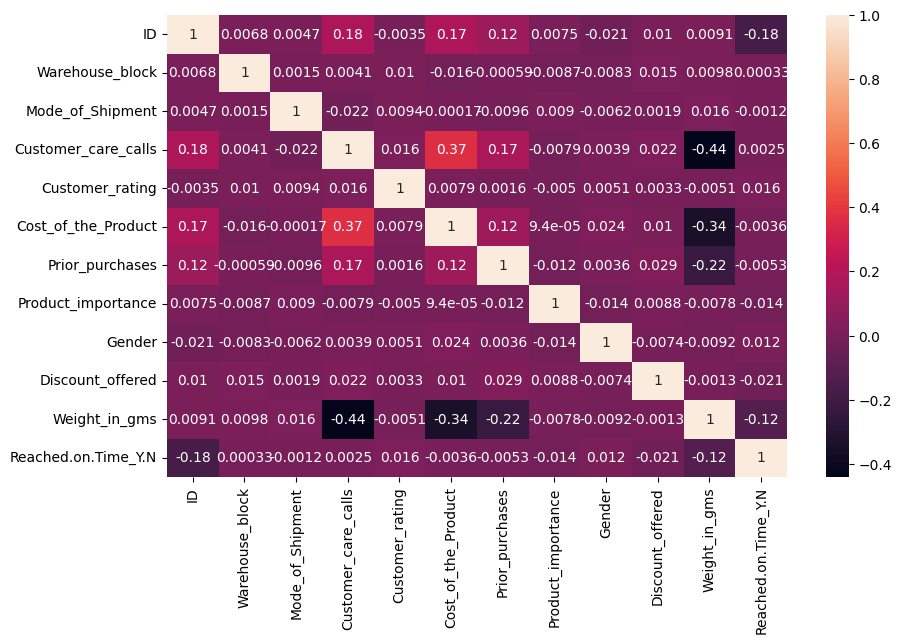

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(data_elim.corr(), ax=ax, annot=True)

In [148]:
# Renombramos para sacar los puntos de la columna llego a tiempo:
data_elim=data_elim.rename({'Reached.on.Time_Y.N':'Reached_on_Time'}, axis=1)

In [149]:
data_elim=data_elim.drop(["ID","Warehouse_block","Gender","Mode_of_Shipment","Customer_rating","Product_importance","Discount_offered"], axis=1)

In [150]:
data_elim

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Weight_in_gms,Reached_on_Time
3,3,176,4,1177,1
6,3,250,3,2371,1
12,3,198,3,3667,1
16,3,143,2,1194,1
22,2,156,2,1750,1
...,...,...,...,...,...
8994,3,217,3,4177,1
8995,5,232,3,4526,0
8996,4,260,3,4221,0
8997,4,184,3,5931,1


In [151]:
# Voy a verificar si esta balanceado el valor a predecir Reached_on_Time
data_elim['Reached_on_Time'].value_counts()

0    3280
1    3072
Name: Reached_on_Time, dtype: int64

In [152]:
# Usamos la libreria sklearn, la funcion split para dividirlo
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
X=data_elim.loc[:,data_elim.columns != 'Reached_on_Time']
y=data_elim.loc[:,data_elim.columns == 'Reached_on_Time']

from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split (X ,y , test_size=0.25, random_state=0) # test_size se 
# recomienda entre 25% y 35%, probe con las 3 alternativas y 30 es la de mejor recall score
os_data_X, os_data_y = os.fit_resample (X_train, y_train)

#Aca verificamos los datos de nuestra data
print ('Tamanio original del dataset', len(data_elim))
print ('Tamanio del upsampled dataset' , len(os_data_X) )
print ('No llegaron a tiempo en el upsampled data es', len (os_data_y[os_data_y["Reached_on_Time"]==0]))
print ('Si llegaron a tiempo en el upsampled  data es', len (os_data_y[os_data_y["Reached_on_Time"]==1]))

Tamanio original del dataset 6352
Tamanio del upsampled dataset 4964
No llegaron a tiempo en el upsampled data es 2482
Si llegaron a tiempo en el upsampled  data es 2482


In [153]:
# Verifico los formatos antes de aplicar el modelo.
print("shape X del dataset oversampled",os_data_X.shape)
print("shape y del dataset oversampled",os_data_y.shape)
print("shape X para entrenamiento", X_train.shape)
print("shape X para testeo       ", X_test.shape)
print("shape y para entrenamiento", y_train.shape)
print("shape y para testeo       ", y_test.shape)

shape X del dataset oversampled (4964, 4)
shape y del dataset oversampled (4964, 1)
shape X para entrenamiento (4764, 4)
shape X para testeo        (1588, 4)
shape y para entrenamiento (4764, 1)
shape y para testeo        (1588, 1)


In [154]:
from sklearn.linear_model import LogisticRegression
modelo1=LogisticRegression()
modelo1.fit(X_train,y_train)

LogisticRegression()

In [155]:
# Importamos una métrica utilizada para evaluar modelos de clasificación. 
from sklearn.metrics import accuracy_score 
# Predecimos sobre el dataset de entrenamiento balanceado
y_pred = modelo1.predict(X_test)
# Evaluamos
print('El score del modelo es:', accuracy_score(y_test, y_pred))

El score del modelo es: 0.5491183879093199


In [156]:
from sklearn.metrics import recall_score
print('El recall del modelo es:', recall_score(y_test, y_pred))

El recall del modelo es: 0.3050632911392405


In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred )) 

              precision    recall  f1-score   support

           0       0.53      0.79      0.64       798
           1       0.59      0.31      0.40       790

    accuracy                           0.55      1588
   macro avg       0.56      0.55      0.52      1588
weighted avg       0.56      0.55      0.52      1588



In [158]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[631 167]
 [549 241]]


In [159]:
data_test = pd.read_excel('E-Commerce_test.xlsx', index_col=0)

In [160]:
data_test=data_test.drop(["Warehouse_block","Gender","Mode_of_Shipment","Customer_rating","Product_importance","Discount_offered"], axis=1)

In [161]:
y_pred_test = modelo1.predict(data_test)
Respuesta1=pd.DataFrame(y_pred_test, columns=["pred"])
Respuesta1.to_csv('mav.csv', index=False)

Enviado un 5to. modelo 22-sept a las 14.00 hs (malisimo)

Enviado un 6to. eliminando solo los de descuento mayor que 10 y no los de mas de 3135 de ID a las 14:48 hs

La Regresion Logistica calculada, tiene un Threshold de 0.50 (por default). Para este caso, las entregas No a tiempo tienen alto impacto negativo, voy a investigar modificarlo (por ejemplo a un 0.7) de modo que la prediccion de no llegar tenga mayor area debajo de la curva sigmoide en el tramo de pendiente positiva.

In [50]:
# Defino clase de la regrsion con el Threshold como parametro. 
# Ver https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e
class LogisticRegressionWithThreshold(LogisticRegression):
    def predict(self, X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return LogisticRegression.predict(self, X)
        else:
            y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(int)

            return y_pred_with_threshold
    
    def threshold_from_optimal_tpr_minus_fpr(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_scores) 

        optimal_idx = np.argmax(tpr - fpr)

        return thresholds[optimal_idx], tpr[optimal_idx] - fpr[optimal_idx]

In [ ]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(X_train, y_train)

threshold, optimal_tpr_minus_fpr = lrt.threshold_from_optimal_tpr_minus_fpr(X_train, y_train)
y_pred = lrt.predict(X_train, threshold)

threshold, optimal_tpr_minus_fpr

## PROBANDO OTROS MODELOS

Usando Pipeline:

In [207]:
import pandas as pd #Importamos las librerías necesarias y los módulos de scikit-learn que utilizaremos
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [208]:
train = pd.read_excel('E-Commerce_train.xlsx') #Ingestamos ambos archivos
test = pd.read_excel('E-Commerce_test.xlsx')

In [209]:
df = train.loc[train['Discount_offered'] <= 10] #Quitamos los descuentos mayores al 10%
importance = {'low':1,'medium':2,'high':3} #Haremos diccionarios para facilitar el replace en cada columna
gender = {'F':1,'M':2}
warehouse = {'A':1,'B':2,'C':3,'D':4,'F':5}
shipment = {'Road':1,'Flight':2,'Ship':3}
num = df.replace({'Product_importance':importance,'Gender':gender,'Warehouse_block':warehouse,'Mode_of_Shipment':shipment}) #Reemplazamos los valores categóricos por códigos numéricos, para poder utilizar los datos con el modelo más tarde
num.describe() #Observamos el dataframe ya numerizado

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000
mean,5722.395466,3.327613,2.517947,4.126574,2.995592,213.714421,3.601385,1.602960,1.499370,5.473709,4091.737406,0.483627
std,2034.881336,1.491974,0.756430,1.175930,1.410416,48.471799,1.527201,0.645304,0.500039,2.874688,1570.853596,0.499771
min,4.000000,1.000000,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1.000000,1.000000,1001.000000,0.000000
25%,4235.750000,2.000000,2.000000,3.000000,2.000000,173.000000,3.000000,1.000000,1.000000,3.000000,2881.000000,0.000000
50%,5823.500000,3.000000,3.000000,4.000000,3.000000,220.000000,3.000000,2.000000,1.000000,5.000000,4598.000000,0.000000
75%,7411.250000,5.000000,3.000000,5.000000,4.000000,254.000000,4.000000,2.000000,2.000000,8.000000,5294.000000,1.000000
max,8999.000000,5.000000,3.000000,7.000000,5.000000,310.000000,10.000000,3.000000,2.000000,10.000000,6102.000000,1.000000


In [221]:
x = num.drop(columns='Reached.on.Time_Y.N').values #Obtenemos los arrays que necesitamos del dataset, uno con las variables y el otro con el target
y = num['Reached.on.Time_Y.N'].values
x.reshape(-1,1) #Nos aseguramos que los arrays tengan la forma necesaria 
y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=7) #Realizamos el split

In [211]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

In [212]:
# Creamos el primer pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

In [213]:
# Creamos el segundo pipeline

pipe_svm = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', svm.SVC(random_state=42))])
			


In [214]:
# Creamos el tercer pipeline

pipe_dt = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

In [215]:
# Los guardamos en una lista

pipelines = [pipe_lr, pipe_svm, pipe_dt]

In [216]:
# Hacemos un diccionario para fines organizativos

pipe_dict = {0: 'Regresión Logística', 1: 'SVM', 2: 'Árbol de decisión'}

In [217]:
# Entrenamos

for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [218]:
# Evaluamos

for idx, val in enumerate(pipelines):
	print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Regresión Logística pipeline accuracy en test: 0.540
SVM pipeline accuracy en test: 0.552
Árbol de decisión pipeline accuracy en test: 0.511


In [219]:
# Identificamos el mejor modelo para el set de testeo

best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx
print('Modelo con el mejor accuracy: %s' % pipe_dict[best_clf])

Modelo con el mejor accuracy: SVM


In [227]:
# Estandarizamos 
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [229]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [232]:
y_Pred = classifier.predict(X_test)

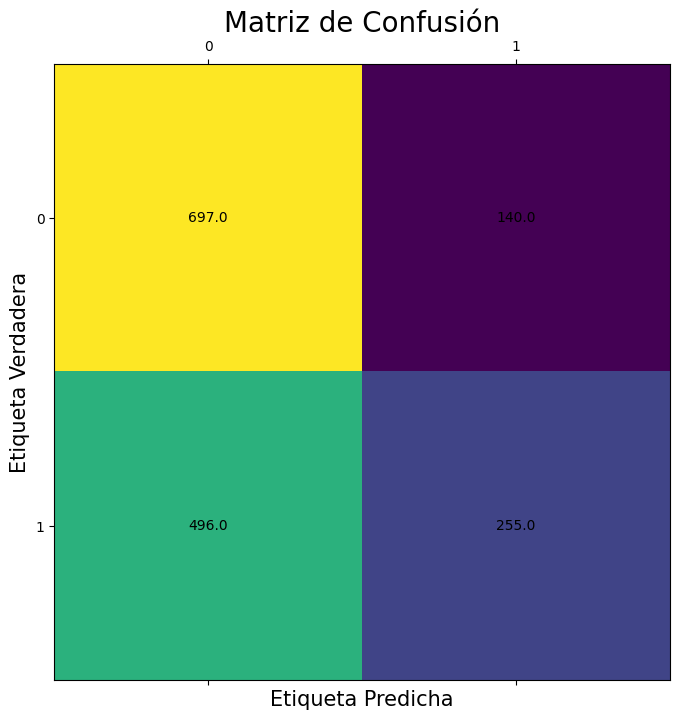

In [234]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [235]:
print(classification_report(y_test, y_Pred))

              precision    recall  f1-score   support

           0       0.58      0.83      0.69       837
           1       0.65      0.34      0.45       751

    accuracy                           0.60      1588
   macro avg       0.61      0.59      0.57      1588
weighted avg       0.61      0.60      0.57      1588

